**A1.1 Aprendizaje estadístico-automático**

**Nombre:** Carlos Hernández Márquez

**Matrícula:** 653602

**Firma de honor:**
"Doy mi palabra que he realizado esta actividad con integridad académica"

# **Importación y visualización inicial de datos**

Antes de comenzar, se importaron las librerías `pandas`, `numpy` y `matplotlib.pyplot`, colocándolas al inicio del código para mantener una mejor organización. Tras cargar el archivo "Obesidad.csv", se solicitaron 11 filas en `head()` para mostrar 10 registros completos, considerando que la primera corresponde a los encabezados.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("A1.1 Obesidad.csv")
print(data.head(11))

      Sexo  Edad  Estatura   Peso FamiliarConSobrepeso ComeMuchasCalorias  \
0   Female  21.0      1.62   64.0                  yes                 no   
1   Female  21.0      1.52   56.0                  yes                 no   
2     Male  23.0      1.80   77.0                  yes                 no   
3     Male  27.0      1.80   87.0                   no                 no   
4     Male  22.0      1.78   89.8                   no                 no   
5     Male  29.0      1.62   53.0                   no                yes   
6   Female  23.0      1.50   55.0                  yes                yes   
7     Male  22.0      1.64   53.0                   no                 no   
8     Male  24.0      1.78   64.0                  yes                yes   
9     Male  22.0      1.72   68.0                  yes                yes   
10    Male  26.0      1.85  105.0                  yes                yes   

    ComeVegetales Fumador  ConsumoDeAgua      NivelDeObesidad  
0          

# **Selección y justificación de variable adicional**

Considero que incluir la variable **duración del sueño** también puede ser importante para el análisis de la obesidad, ya que diversos estudios han demostrado que el tiempo de descanso influye directamente en procesos metabólicos y en la regulación del apetito, aspectos clave en el desarrollo y mantenimiento de la obesidad (Taheri et al., 2004).

Cuando se habla específicamente de la duración del sueño, esta se considera una *variable cuantitativa continua* porque se mide en unidades numéricas precisas, típicamente horas o fracciones de horas de sueño por noche. 

Es importante destacar que la duración del sueño está estrechamente relacionada con su calidad, así como con factores como la alimentación, que en conjunto impactan el estado nutricional y metabólico (Grandner et al., 2010). Por ello, la variable también puede clasificarse en categorías basadas en rangos de horas, tales como sueño insuficiente (<6 horas), adecuado (6-8 horas) y excesivo (>8 horas). En este caso, *la variable pasa a ser cualitativa ordinal*, porque mantiene un orden lógico en las categorías, pero no tiene diferencias numéricas iguales entre ellas.

# **Definición y análisis de variable respuesta**

En un estudio de inferencia, donde se busca entender cómo una o más variables explicativas influyen sobre una variable de interés, la variable de respuesta que seleccionaría sería el **NivelDeObesidad**, pues refleja el estado corporal de cada individuo basado en el índice de masa corporal y es el resultado principal a explicar. Las demás variables, como sexo, edad, hábitos alimenticios, consumo de agua y antecedentes familiares, se pueden considerar explicativas, ya que pueden estar asociadas o influir en el nivel de obesidad.

Dado que NivelDeObesidad es una **variable cualitativa**, es importante conocer la distribución de personas en cada categoría para analizar adecuadamente sus relaciones con las variables explicativas.

In [4]:
conteoObesidad = data['NivelDeObesidad'].value_counts()
print(conteoObesidad)

NivelDeObesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


# **Gráfica exploratoria para población específica**

A continuación, se analizará la relación entre la edad y el nivel de obesidad con el objetivo de identificar posibles grupos de riesgo. Este análisis permite comprender cómo varía la obesidad a lo largo de las diferentes edades y facilitará la detección de segmentos poblacionales que requieren mayor atención.




In [5]:
edadHombre = data.Edad[data.Sexo == "Male"]
nivelHombre = data.NivelDeObesidad[data.Sexo == "Male"].astype('category').cat.codes
categorias = data.NivelDeObesidad.astype('category').cat.categories

Para el análisis se filtraron los datos únicamente de la **población masculina**. La variable NivelDeObesidad, al ser categórica, requiere ser transformada a formato numérico para su representación gráfica y análisis estadístico. Aunque una opción común es asignar manualmente valores numéricos a cada categoría mediante un diccionario, este método puede ser poco práctico cuando se manejan variables con muchas categorías.

Por ello, se optó por utilizar el método `astype('category').cat.codes` de pandas, que codifica automáticamente cada categoría con un valor numérico único y ordenado. Además, se creó una variable llamada **categorías** para almacenar el orden de las categorías originales. Esto permite asignar etiquetas en el eje Y de la gráfica, asegurando que cada código numérico corresponda a su categoría respectiva al momento de visualizar los datos.

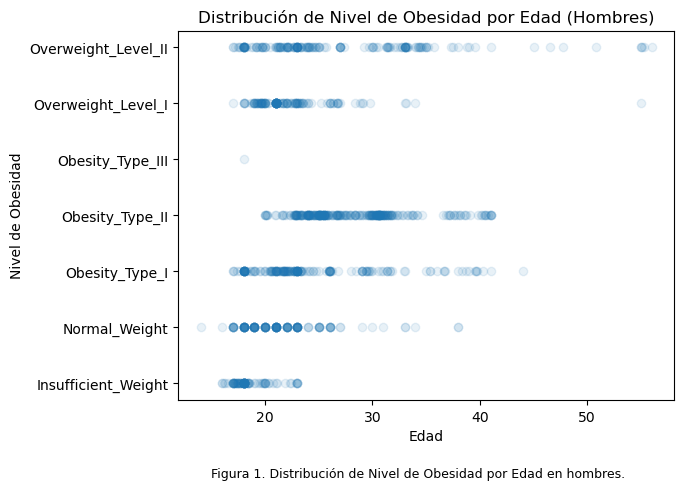

In [7]:
%matplotlib inline
plt.scatter(x=edadHombre, y=nivelHombre, alpha=0.1)
plt.yticks(ticks=range(len(categorias)), labels=categorias)
plt.xlabel('Edad')
plt.ylabel('Nivel de Obesidad')
plt.title('Distribución de Nivel de Obesidad por Edad (Hombres)')
plt.figtext(0.5, -0.05, 'Figura 1. Distribución de Nivel de Obesidad por Edad en hombres.', ha='center', fontsize=9)
plt.show()

En la Figura 1 observa una concentración significativa de casos en las categorías de sobrepeso y obesidad en edades tempranas dentro de la población masculina, especialmente hacia el final de la adolescencia y durante los veintitantos años. Este patrón sugiere que la aparición de conductas y condiciones de riesgo se produce de forma prematura, por lo que el problema no puede atribuirse únicamente a los procesos de degeneración fisiológica asociados con el envejecimiento.

En los hombres, las categorías *Overweight* y *Obesity_Type_I/II* presentan la mayor densidad en este rango etario, conformando un “núcleo” poblacional en el que el exceso de peso es más frecuente. En contraste, la categoría *Insufficient_Weight* se concentra en edades más jóvenes y prácticamente desaparece en etapas posteriores de la vida.

A partir de estos hallazgos, se puede plantear la siguiente hipótesis: *A medida que aumenta la edad en la población masculina, también se incrementa la probabilidad de encontrarse en una categoría de mayor obesidad.* Esto implicaría que el riesgo de sobrepeso y obesidad sigue una tendencia ascendente con el paso del tiempo.




# **Bibliografía**

Grandner, M. A., Jackson, N., Gerstner, J. R., & Knutson, K. L. (2014). Sleep symptoms associated with intake of specific dietary nutrients. Journal of Sleep Research, 23(1), 22-34. https://doi.org/10.1111/jsr.12084

Pandas. Categorical. Codes—Pandas 2. 3. 1 documentation. (s. f.). Recuperado 10 de agosto de 2025, de https://pandas.pydata.org/docs/reference/api/pandas.Categorical.codes.html

Taheri, S., Lin, L., Austin, D., Young, T., & Mignot, E. (2004). Short sleep duration is associated with reduced leptin, elevated ghrelin, and increased body mass index. PLoS Medicine, 1(3), e62. https://doi.org/10.1371/journal.pmed.0010062
